In [1]:
"""
데이터 출처 : 사회보장국(www.ssa.gov)
이름 데이터 분석
1) 시대별 흔한 이름 -> 각 년도별로 가장 인기있는(비율이 높은) 이름 추출
2) 년도별로 이름 순위 -> 가장 빈도가 높거나 낮은 이름
3) 특정 이름의 유행(엘비스, 마이클잭슨, 마릴린먼로, 마돈나, 성서 이름)
4) 모음, 자음, 길이, 철자 변화, 첫/마지막 글자
5) 이름의 다양성
6) 남성 <-> 여성 크로스가 이루어진 이름
...

1)각 년도별로 가장 인기있는(비율이 높은) 이름 추출 ->
가장 빈도수가 높은 이름부터 낮은 이름순으로 10개 이름 출력
1880년~2010년 남자 아이 이름 1등=>['John','John', ..., 'Mary']

2) 
- names에서 성별로 나누었을때, 이름에 대한 모음 및 자음 비율?
- 남자 아이 이름에 대해 가장 많이 사용된 알파벳 문자?
- 여자 아이 이름에 대해 가장 많이 사용된 알파벳 문자?

3) adv.
남성 <-> 여성 크로스가 이루어진 이름




"""

'\n데이터 출처 : 사회보장국(www.ssa.gov)\n이름 데이터 분석\n1) 시대별 흔한 이름 -> 각 년도별로 가장 인기있는(비율이 높은) 이름 추출\n2) 년도별로 이름 순위 -> 가장 빈도가 높거나 낮은 이름\n3) 특정 이름의 유행(엘비스, 마이클잭슨, 마릴린먼로, 마돈나, 성서 이름)\n4) 모음, 자음, 길이, 철자 변화, 첫/마지막 글자\n...\n\n'

In [2]:
import pandas as pd
import numpy as np

In [12]:
#!head -n 10 yob/yob1880.txt
#path 지정해주면 에러 해결됨

names1880=pd.read_csv("yob/yob1880.txt", 
            header=None, 
            names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [26]:
#데이터를 특정 기준(컬럼)으로 그룹화(groupby) -> 그룹 단위의 연산(sum, max, count,...)
names1880.groupby('sex').name.count()
names1880.groupby('sex').births.sum()
#names1880.info()
names1880.groupby('sex').births.sum()/names1880.groupby('sex').name.count()



sex
F     96.595541
M    104.435728
dtype: float64

In [29]:
type(names1880)
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [42]:
#1880년~2010년까지 데이터 파일 읽어들이기

pieces=[]
#리스트에 131개의 데이터프레임을 담기 위한 변수
#리스트에 데이터프레임을 요소로 저장

#feature engineering(특성 공학) :데이터의 기존 변수로부터 연산을 통해
#새로운 변수를 생성하는 작업. ex)국어, 영어 => 평균



for year in range(1880, 2011):
    path="yob/yob%d.txt" % year
    df=pd.read_csv(path,
                   header=None,
                   names=['name', 'sex', 'births'])
    df['year']=year
    pieces.append(df)
len(pieces)

131

In [43]:
#pieces #리스트 안에 데이터프레임 131개가 요소로 저장

#리스트내의 데이터프레임을 모두 합쳐서 1개의 데이터프레임으로 만들자
names=pd.concat(pieces, ignore_index=True) #concatenate
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [41]:
#성별에 따른 births의 합계
#과연 1880~2010년까지 태어난 아이들의 수를 성별에 따라 비교

names.groupby('sex').births.sum()

sex
F    159990140
M    162412587
Name: births, dtype: int64

In [61]:
import matplotlib.pyplot as plt

In [63]:
#성별에 따른 년도별 births의 합계 (2*131개 그룹)
#과연 1880~2010년까지 태어난 아이들의 수를 연도로 나누어 성별에 따라 비교

#names.groupby('sex').groupby('year').births.sum() 에러발생

#두 개 이상의 컬럼을 기준으로 그룹화
names.groupby(['sex','year']).births.sum() 

#pivot_table함수를 이용한 연산
names.pivot_table('births', index='year', columns='sex', aggfunc=max)

#aggfunc=np.mean 값이 기본으로 설정
#데이터프레임.pivot_table(데이터, index=행, columns=열, aggfunc=연산함수)

total_births=names.pivot_table('births', index='year', columns='sex', aggfunc=max)



<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

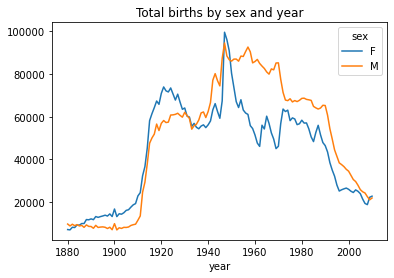

In [66]:
total_births
#시각화 방법
#matplotlib, seaborn, 데이터프레임, plotly, 타블로, ...

total_births.plot(title='Total births by sex and year')

In [68]:
def add_prop(gr):
    gr['prop']=gr.births/gr.births.sum()
    return gr

names=names.groupby(['year', 'sex']).apply(add_prop)
#데이터프레임.groupby().apply(함수)

In [69]:
names
#연도별/성별 각 그룹별 prop값의 합을 출력

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [73]:
names.groupby(['year','sex']).prop.sum()

names.groupby(['year','sex'])['prop'].sum()

names.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

sex,F,M
year,,
1880,1.0,1.0
1881,1.0,1.0
1882,1.0,1.0
1883,1.0,1.0
1884,1.0,1.0
...,...,...
2006,1.0,1.0
2007,1.0,1.0
2008,1.0,1.0


In [ ]:
#각 연도/성별에 따라 그룹화 -> births 기준 내림차순 정렬
#-> 각 그룹별 상위 1000개의 데이터만 추출

In [84]:
def getTop1000(gr):
    return gr.sort_values('births', ascending=False)[:1000]   

top1000=names.groupby(['year', 'sex']).apply(getTop1000)

In [85]:
top1000.reset_index(drop=True, inplace=True)

In [86]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [102]:
top1000[(top1000['sex']=='F') & (top1000['year']==1880)]


#top1000[(top1000['year'] == 2010) & (top1000['sex'] == 'F')] 


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
937,Georgina,F,5,1880,0.000055
938,Genie,F,5,1880,0.000055
939,Etter,F,5,1880,0.000055
940,Estie,F,5,1880,0.000055


In [125]:
#마릴린, 마돈나, 마이클잭슨, 엘비스
#Marilyn, Madonna, Elvis, Michael
#
#names에서 Marilyn, Madonna, Elvis, Michael 이름이 존재?


top1000.name
top1000[(top1000['name']=='Michael') & (top1000['year']==2000)]

,name,sex,births,year,prop
240878,Michael,M,32016,2000,0.016321


In [122]:
#과거(남자) -> 현재(여자)
#과거(여자) -> 현재(남자)
#성별에 따른 이름 선호도 변화

#분석 대상 데이터 : 남자, 여자 모두에서 등장하는 이름

In [129]:
girls=top1000[top1000.sex=='F']
boys=top1000[top1000.sex=='M']

In [137]:
totalBirths=top1000.pivot_table('births', 
                    aggfunc=sum, 
                    index='year', 
                    columns='name')

In [134]:
totalBirths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [144]:
subset=totalBirths[['Marilyn','Madonna', 'Elvis', 'Michael','John', 'Harry','Mary']]
#Marilyn, Madonna, Elvis, Michael

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

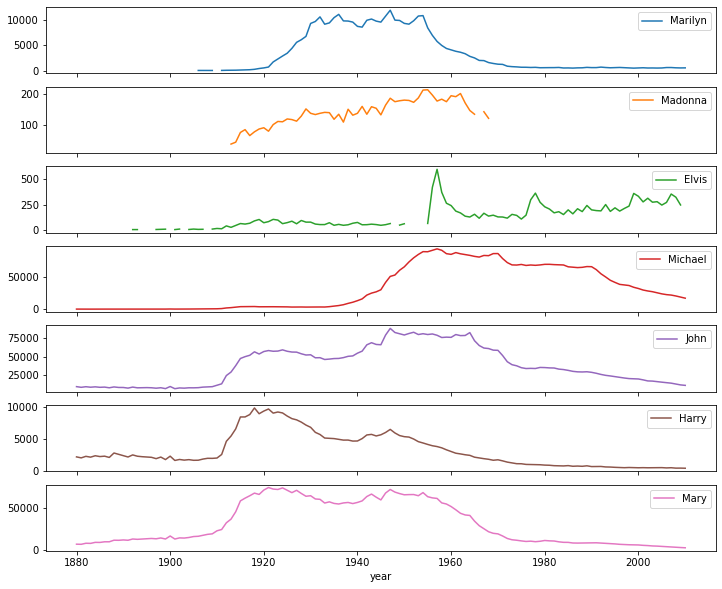

In [148]:
subset.plot(subplots=True, figsize=(12,10)) #1 당 72 pixel

In [154]:
#이름의 다양성 파악해보자
#이름의 종류 개수 비교
#비율 확인 ex) 연도/성별로 그룹 -> 상위 1000등까지 이름 추출(top1000)
top1000
 
#prop= count(Mary) / sum(births) ... count(Zuri) / sum(births) 

#2010년 M/F에 대해 prop열 값의 합을 출력
top1000[(top1000["year"]==2010) & (top1000["sex"]=="F")].prop.sum()


0.7367803480366797

In [155]:
top1000[top1000['year'] == 2010].groupby(['sex'])['prop'].sum()

sex
F    0.736780
M    0.843156
Name: prop, dtype: float64

In [159]:
top1000[top1000['year'] == 2010].groupby(['sex'])['prop'].sum()

sex
F    0.736780
M    0.843156
Name: prop, dtype: float64

In [161]:
top1000[top1000['year']==2010].pivot_table('prop', index='sex', aggfunc=sum)



,prop
sex,
F,0.736780
M,0.843156


In [162]:
#각 그룹별 prop열 값의 누적합이 50%되는 시점에서 이름의 종류 개수?

In [ ]:
#top1000에서 2010년 여성 그룹에 대해 prop열 값을 누적합

<AxesSubplot:xlabel='year'>

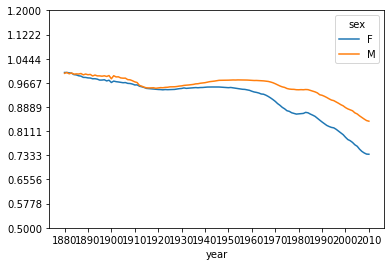

In [168]:
table=top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(yticks=np.linspace(0.5,1.2,10), xticks=range(1880,2020,10))

In [172]:
df=boys[boys.year==2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [196]:
prop_cumsum=df.sort_values('prop', ascending=False).prop.cumsum()
#prop_cumsum.iloc[0]
#prop_cumsum.reset_index().loc[0]

#prop_cumsum[110:120] #116번이 0.5를 초과한 최초 지점
prop_cumsum.values.searchsorted(0.5) #116
#각 그룹별 prop열 값의 누적합이 50%되는 시점에서 이름의 종류 개수?
#2010년 남자아이:116개


116

In [197]:
df=girls[girls.year==2010]
df

,name,sex,births,year,prop
259877,Isabella,F,22731,2010,0.012923
259878,Sophia,F,20477,2010,0.011641
259879,Emma,F,17179,2010,0.009766
259880,Olivia,F,16860,2010,0.009585
259881,Ava,F,15300,2010,0.008698
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


In [198]:
prop_cumsum=df.sort_values('prop', ascending=False).prop.cumsum()
prop_cumsum.values.searchsorted(0.5) #245

245

In [199]:
#2010년 기준, 상위 50%에 해당되는 남자 이름 개수:116, 여자 이름 개수:245
#여자 아이 이름이 다양하다

In [200]:
dfg=girls[girls.year==1900]
dfb=boys[boys.year==1900]

In [201]:
prop_cumsum=dfg.sort_values('prop', ascending=False).prop.cumsum()
prop_cumsum.values.searchsorted(0.5) #48

48

In [202]:
prop_cumsum=dfb.sort_values('prop', ascending=False).prop.cumsum()
prop_cumsum.values.searchsorted(0.5) #24

24

In [216]:
names[['sex']] #데이터프레임(행렬과 유사)에서 각각의 열을 시리즈라고 함
 #데이터프레임(행렬과 유사)에서 1개 이상의 열을 추출하면 데이터프레임
names['sex']

#데이터프레임에서 1개 이상의 열을 추출할 수 있음.
#단, 1개 열 추출시 대괄호를 2쌍 기술하면 데이터프레임으로, 1쌍 기술하면 시리즈로 출력
#2개 이상 열 추출시 무조건 대괄호를 2쌍 기술 


0          F
1          F
2          F
3          F
4          F
          ..
1690779    M
1690780    M
1690781    M
1690782    M
1690783    M
Name: sex, Length: 1690784, dtype: object

In [232]:
#names.name.loc[1690783][-1]
#names.name.iloc[0]

In [234]:
getLastLetter=lambda n:n[-1]
lastLetters=names.name.map(getLastLetter)

lastLetters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [236]:
lastLetters.name='last_letter'

In [237]:
lastLetters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [243]:
table=names.pivot_table('births', index=lastLetters, columns=['year', 'sex'], aggfunc=sum)
#names에서 각 연도별 성별에 따라 태어난 아이 이름의 마지막글자 a~z에 대해 births
#열 값의 합
table


year            1880              1881              1882              1883  \
sex                F        M        F        M        F        M        F   
last_letter                                                                  
a            31446.0    776.0  31581.0    767.0  36536.0    773.0  38330.0   
b                NaN    509.0      NaN    470.0      NaN    506.0      NaN   
c                NaN    349.0      NaN    331.0      5.0    349.0      5.0   
d              609.0   9177.0    607.0   8387.0    734.0   9702.0    810.0   
e            33378.0  13493.0  34080.0  12406.0  40399.0  14613.0  41914.0   
f                NaN    108.0      NaN     83.0      NaN    135.0      NaN   
g                7.0    147.0      5.0    146.0     12.0    146.0      8.0   
h             4863.0   4049.0   4784.0   3766.0   5567.0   4176.0   5701.0   
i               61.0    200.0     78.0    206.0     81.0    207.0     76.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0   4720.0     15.0   4149.0     11.0   4723.0     17.0   
l             2541.0   5090.0   2911.0   4571.0   3527.0   5427.0   3848.0   
m               58.0  11260.0     57.0  10217.0     81.0  11255.0     86.0   
n             3008.0  16929.0   2959.0  15436.0   3576.0  17003.0   3837.0   
o               30.0    933.0     49.0    800.0     35.0    926.0     47.0   
p                NaN    282.0      NaN    271.0      NaN    308.0      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0   7454.0    417.0   7273.0    590.0   7988.0    640.0   
s             1391.0  18453.0   1316.0  16371.0   1637.0  18240.0   1794.0   
t             2152.0   6949.0   2165.0   6228.0   2399.0   7081.0   2554.0   
u              380.0     25.0    427.0     26.0    410.0     10.0    444.0   
v                NaN     33.0      NaN     18.0      NaN     43.0      NaN   
w                NaN    853.0      5.0    748.0      NaN    875.0      NaN   
x                NaN    304.0      NaN    267.0      NaN    355.0      7.0   
y            10469.0   8371.0  10404.0   7803.0  12145.0   8815.0  12063.0   
z              106.0     29.0     95.0      8.0    106.0     31.0    141.0   

year                     1884           ...      2006                2007  \
sex                M        F        M  ...         F         M         F   
last_letter                             ...                                 
a              757.0  43680.0    817.0  ...  753391.0   36156.0  752779.0   
b              452.0      NaN    496.0  ...     367.0   42600.0     409.0   
c              299.0      NaN    319.0  ...     633.0   26635.0     775.0   
d             8796.0    916.0   9856.0  ...    3600.0   51410.0    3355.0   
e            13191.0  48089.0  14637.0  ...  330236.0  142999.0  334422.0   
f              106.0      NaN    131.0  ...      60.0    1968.0      51.0   
g              135.0     24.0    160.0  ...     463.0    1929.0     515.0   
h             3925.0   6602.0   4242.0  ...  134247.0   98477.0  138360.0   
i              167.0     84.0    158.0  ...   52887.0   33558.0   55789.0   
j                NaN      NaN      NaN  ...     134.0    1241.0     171.0   
k             4387.0     21.0   4770.0  ...     625.0   42537.0     674.0   
l             5100.0   4808.0   5604.0  ...   54637.0  156234.0   54884.0   
m            10114.0     79.0  10732.0  ...    4294.0   42503.0    4508.0   
n            15867.0   4507.0  17157.0  ...  253359.0  720998.0  264724.0   
o              812.0     74.0    939.0  ...    2095.0   96350.0    2151.0   
p              286.0      NaN    275.0  ...      42.0    2721.0      39.0   
q                NaN      NaN      NaN  ...      19.0     430.0      40.0   
r             7510.0    718.0   8983.0  ...   35730.0  176490.0   34176.0   
s            16544.0   2039.0  17712.0  ...   28080.0  143232.0   25983.0   
t             6754.0   2825.0   7008.0  ...

In [244]:
df = pd.DataFrame({'id': ['a', 'b', 'c', 'd', 'e', 'f'],
'var': [1, 2, 3, 4, 5, 6]})

In [245]:
df

,id,var
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
5,f,6


In [246]:
#데이터프레임(시리즈)에 isin() 메서드 안의 값이 들어있으면  True

In [251]:
df['id'].isin(['b', 'e', 'k'])
#df의 id열 값이 b 또는 e 또는 k입니까?

0    False
1     True
2    False
3    False
4     True
5    False
Name: id, dtype: bool

In [252]:
df[df['id'].isin(['b', 'e', 'k'])]

,id,var
1,b,2
4,e,5


In [254]:
df[df['id'].isin(['b', 'e', 'k']) | df['var'].isin([1,8])]

,id,var
0,a,1
1,b,2
4,e,5
